In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
import cv2
from functions.functions import  find_correspondences , align_and_merge_images  , umeyama_alignment

In [3]:
img1 = cv2.imread('images/test_1_1.jpeg')
img2 = cv2.imread('images/test_1_2.jpeg')


In [4]:
with open("correspondences.json" , 'r') as f:
    data = json.load(f)

In [10]:
src = np.array([item["img1_xy"] for item in data])  # transformed image
dst = np.array([item["img2_xy"] for item in data])  # original image

print("Source points:\n", src)
print("Destination points:\n", dst)

Source points:
 [[1282  792]
 [ 618  210]
 [1672   88]
 [ 604  730]]
Destination points:
 [[2852  770]
 [2156  174]
 [3198  116]
 [2138  738]]


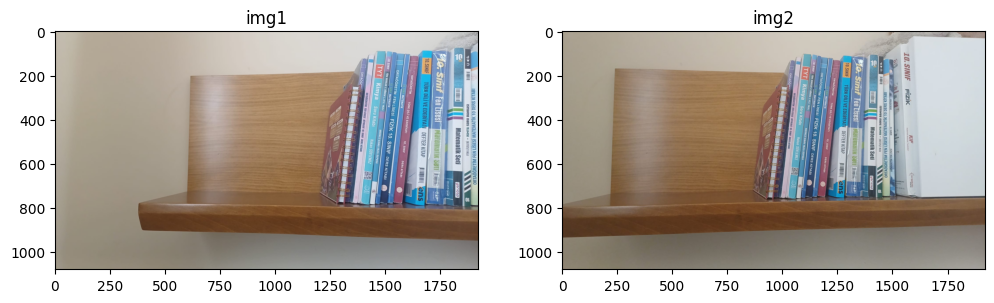

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("img1")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("img2")
plt.show()

In [12]:
R , t = umeyama_alignment(src , dst)
print("Rotation Matrix :\n" , R)
print("Transtion Matrix :\n" , t)

Rotation Matrix :
 [[ 0.99996505 -0.00836027]
 [ 0.00836027  0.99996505]]
Transtion Matrix :
 [1545.84040858  -14.21222151]


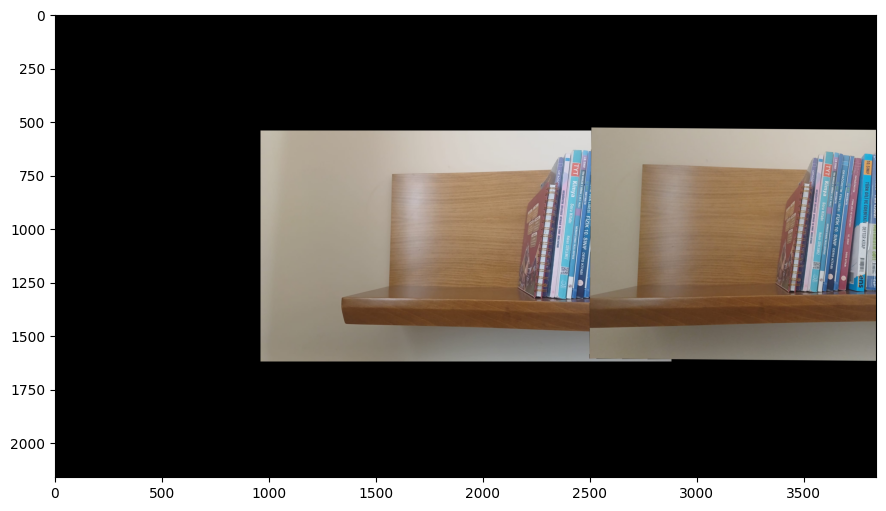

In [13]:
result = align_and_merge_images(img1, img2, src, dst)

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))